# Regressão 01 - tarefa 01

In [22]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset

import matplotlib.pyplot as plt

import numpy as np

import statsmodels.formula.api as smf

from scipy import stats

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [23]:
# a.

# Carregando a base de gorjetas
tips = sns.load_dataset("tips")

#Criando a variável tip_pct - % da Gorjeta em Relação ao Valor Líquido da Conta
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])

# Criando a variável net_bill - Valor Líquido da Conta
tips['net_bill'] = tips['total_bill'] - tips['tip']

#tips.head()

# Reproduzindo a Regressão de tip Explicada por net_bill
regression_model = smf.ols(formula='tip ~ net_bill', data=tips).fit()
print(regression_model.summary())


                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.333
Model:                            OLS   Adj. R-squared:                  0.330
Method:                 Least Squares   F-statistic:                     120.6
Date:                Sat, 22 Jul 2023   Prob (F-statistic):           5.02e-23
Time:                        19:35:34   Log-Likelihood:                -375.63
No. Observations:                 244   AIC:                             755.3
Df Residuals:                     242   BIC:                             762.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.3307      0.168      7.907      0.0

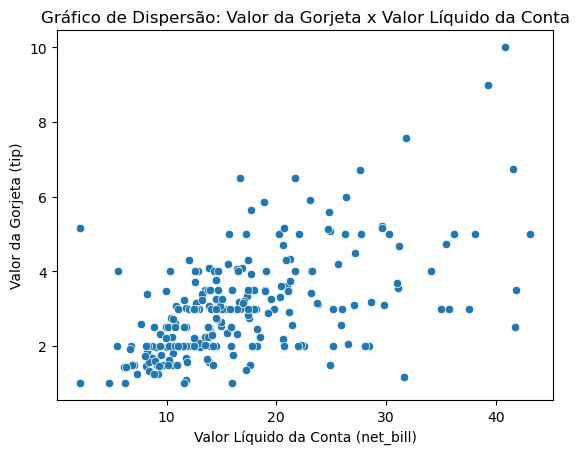

In [24]:
# b.

# Reproduzindo o gráfico de dispersão entre tip e net_bill
sns.scatterplot(x='net_bill', y='tip', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Valor da Gorjeta (tip)')
plt.title('Gráfico de Dispersão: Valor da Gorjeta x Valor Líquido da Conta')
plt.show()

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

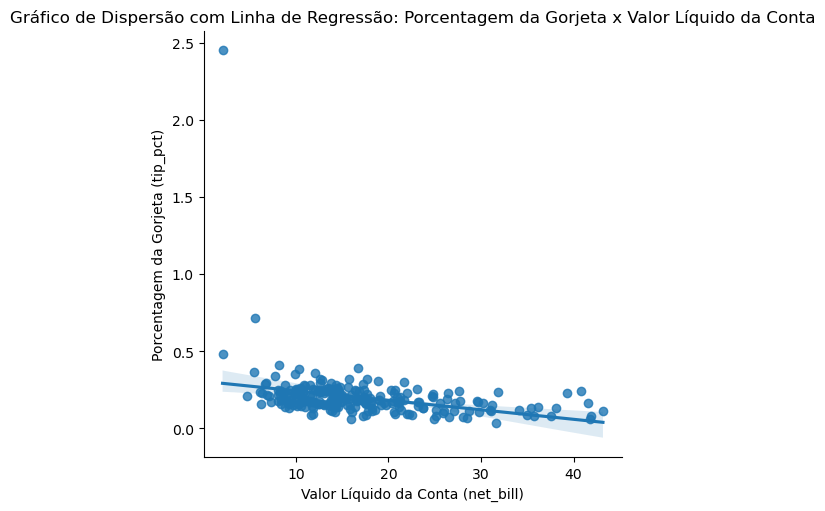

In [25]:
sns.lmplot(x='net_bill', y='tip_pct', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.title('Gráfico de Dispersão com Linha de Regressão: Porcentagem da Gorjeta x Valor Líquido da Conta')
plt.show()

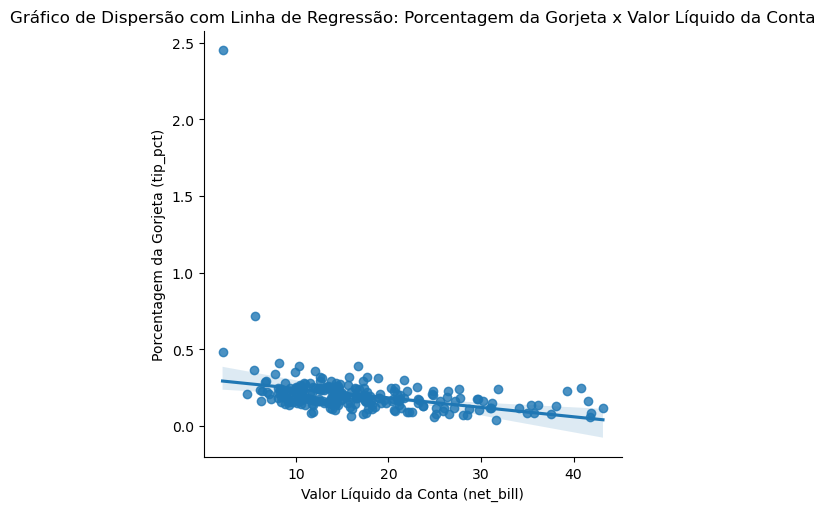

In [26]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Gráfico de dispersão com linha de regressão
sns.lmplot(x='net_bill', y='tip_pct', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Porcentagem da Gorjeta (tip_pct)')
plt.title('Gráfico de Dispersão com Linha de Regressão: Porcentagem da Gorjeta x Valor Líquido da Conta')
plt.show()


In [27]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Interpretando os coeficientes
coef_intercept = regression_model.params['Intercept']
coef_net_bill = regression_model.params['net_bill']

print(f"Coeficiente Intercepto: {coef_intercept:.4f}")
print(f"Coeficiente net_bill: {coef_net_bill:.4f}")


Coeficiente Intercepto: 0.3053
Coeficiente net_bill: -0.0061


In [28]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Verificando a significância estatística
p_value_net_bill = regression_model.pvalues['net_bill']

if p_value_net_bill < 0.05:
    print("O coeficiente de net_bill é estatisticamente significativo.")
else:
    print("O coeficiente de net_bill não é estatisticamente significativo.")


O coeficiente de net_bill é estatisticamente significativo.


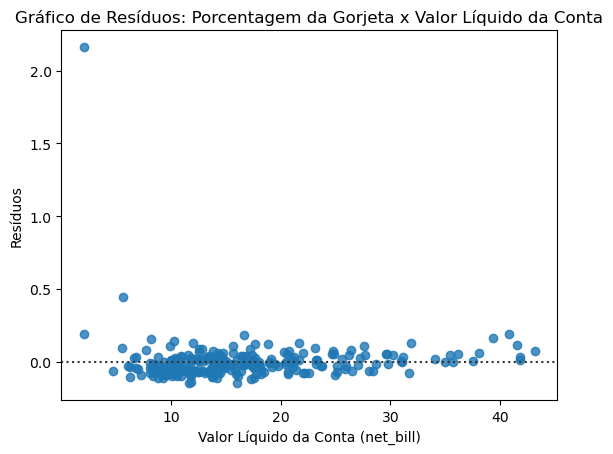

Os resíduos não seguem uma distribuição normal.
Matriz de Correlação entre as Variáveis Independentes:
            total_bill       tip      size   tip_pct  net_bill
total_bill    1.000000  0.675734  0.598315 -0.235072  0.991906
tip           0.675734  1.000000  0.489299  0.241572  0.576663
size          0.598315  0.489299  1.000000 -0.102808  0.578831
tip_pct      -0.235072  0.241572 -0.102808  1.000000 -0.302144
net_bill      0.991906  0.576663  0.578831 -0.302144  1.000000


C:\Users\Usuario\AppData\Local\Temp\ipykernel_3124\1705200048.py:22: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = tips.corr()


In [30]:
# Ajustando o modelo de regressão de tip_pct por net_bill
regression_model = smf.ols(formula='tip_pct ~ net_bill', data=tips).fit()

# Gráfico de resíduos
sns.residplot(x='net_bill', y='tip_pct', data=tips)
plt.xlabel('Valor Líquido da Conta (net_bill)')
plt.ylabel('Resíduos')
plt.title('Gráfico de Resíduos: Porcentagem da Gorjeta x Valor Líquido da Conta')
plt.show()

# Verificando normalidade dos resíduos
residuals = regression_model.resid
normality_test = stats.normaltest(residuals)
if normality_test.pvalue < 0.05:
    print("Os resíduos não seguem uma distribuição normal.")
else:
    print("Os resíduos seguem uma distribuição normal.")

# Verificando multicolinearidade (caso haja outras variáveis independentes)
# Você pode utilizar a matriz de correlação entre as variáveis independentes para verificar a multicolinearidade.

correlation_matrix = tips.corr()
print("Matriz de Correlação entre as Variáveis Independentes:")
print(correlation_matrix)


### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

**COMPARAÇÃO DOS GRÁFICOS**
* Os dois gráficos mostram a relação entre a variável dependente (gorjeta ou % da gorjeta) e a variável independente (valor líquido da conta) em diferentes perspectivas, o primeiro gráfico é útil para visualizar a dispersão dos dados e avariabilidade da gorjeta em relação ao valor líquido da conta, já o segundo é mais informativo, pois mostra a tendência geral da porcentagem da gorjeta em relação ao valor líquido da conta através da linha de regressão.

<br>

**COMPARAÇÃO DIRETA DOS R²s**
* Não é apropriado a comparação direta dos R²s dos gráficos, pois os modelos diferem entre si, enquanto um a variável dependente é ovalor absoluta da gorjeta o outro é a porcentagem da gorjeta, cada R² pode ser útil para avaliar quão bem a variável independente explica a variabilidade da variável dependente dentro de cada contexto.


### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [32]:
# 1. Obtendo valor predito para tip_pct
tip_pct_pred = regression_model.fittedvalues

In [33]:
# 2. Obtendo valor predito para tip
tip_pred = tip_pct_pred * tips['net_bill']

In [34]:
# 3. Calculando R² para o Modelo em Relação à Variável tip
r_squared_tip = regression_model.rsquared

In [37]:
# 4. Comparando novo R² com o do item 1.
regression_model = smf.ols(formula='tip_pct ~net_bill', data=tips).fit()
r_squared_tip_pct = regression_model.rsquared

print(f"R² do modelo do item 1 (tip ~ net_bill): 0.333")
print(f"R² do modelo do item 4 (tip_pct ~ net_bill): {r_squared_tip_pct:.4f}")


R² do modelo do item 1 (tip ~ net_bill): 0.333
R² do modelo do item 4 (tip_pct ~ net_bill): 0.0913


* Como visto no resultado da questão anterior, o item 1 possui um ajuste melhor aos dados do que o outro modelo, sugerindo que a variável [net_bill] tem uma relação mais forte com [tip] do que com [tip_pct].